<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
/tmp/pkruyt/ipykernel_37273/829640170.py:28: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(data[:, 0],-data[:, 1], label=f'$T_\perp$={T_perp:.0e} e')


BETACOOL----------release ver.7.2.beta (omp)----------2024/12/20
../../../betacool/Betacool ../../LEIR.bld /f
Input parameter [12,11] was initialised with default value:1e+10
Cannot open file : Bring3.bump
Mean beam radius= 0.1370049566  is more than chamber 4
Mean beam radius= 0.1370049566  is more than chamber 4
FINISH: 2024/12/20-10:0:58

TODO: simple version here...
BETACOOL----------release ver.7.2.beta (omp)----------2024/12/20
../../../betacool/Betacool ../../LEIR.bld /f
Input parameter [12,11] was initialised with default value:1e+10
Cannot open file : Bring3.bump
Mean beam radius= 0.1370049566  is more than chamber 4
Mean beam radius= 0.1370049566  is more than chamber 4
FINISH: 2024/12/20-10:0:58

TODO: simple version here...
BETACOOL----------release ver.7.2.beta (omp)----------2024/12/20
../../../betacool/Betacool ../../LEIR.bld /f
Input parameter [12,11] was initialised with default value:1e+10
Cannot open file : Bring3.bump
Mean beam radius= 0.1370049566  is more than cha

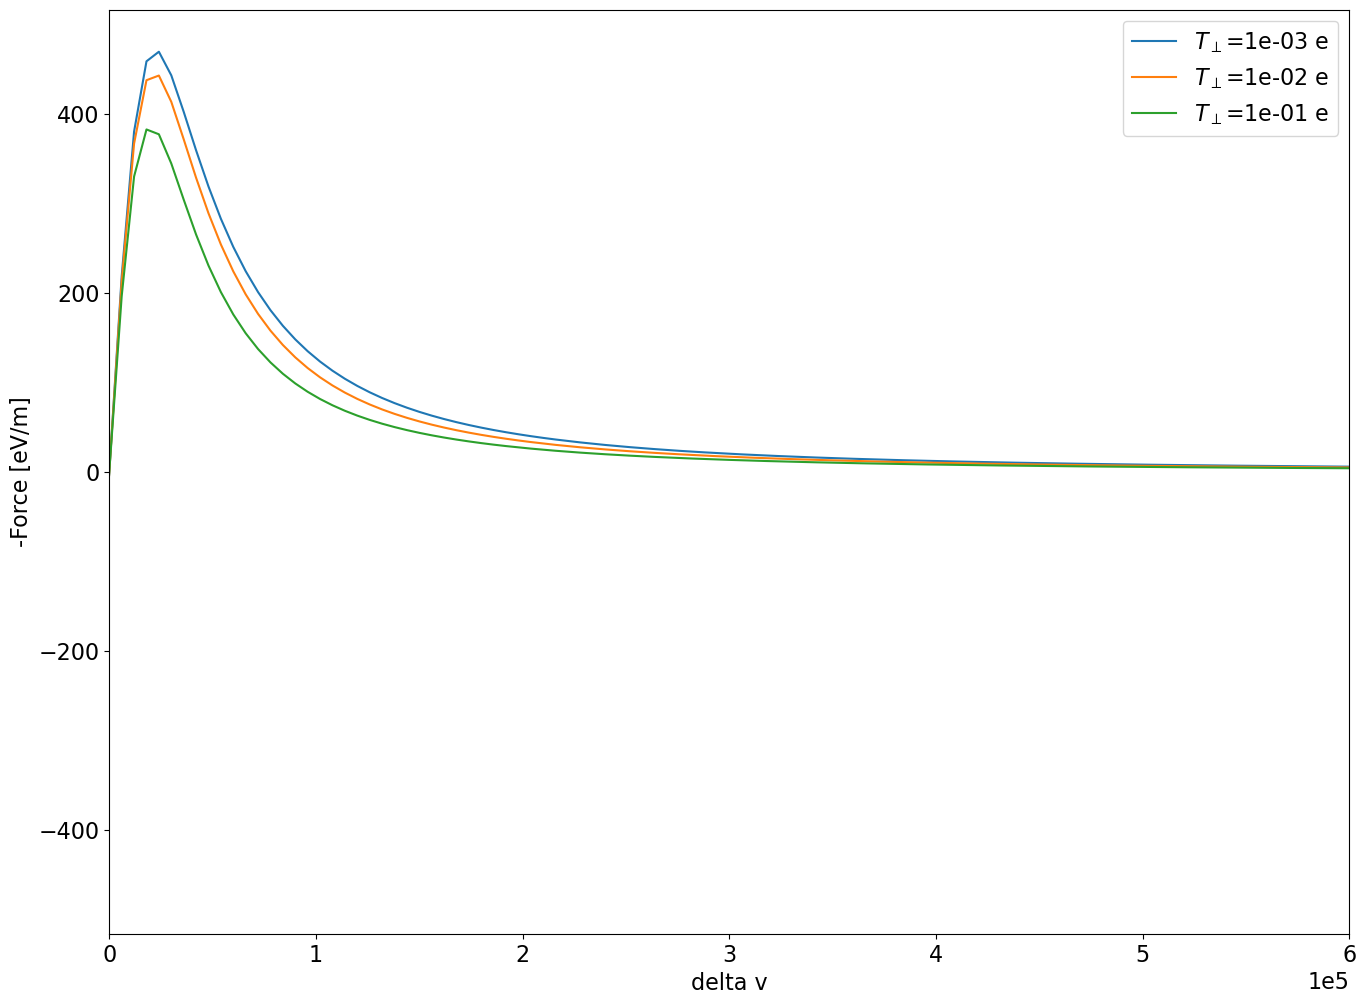

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pybetacool import PyBetaCool

T_perp_list = [0.001,0.01,0.1] # eV

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16, 12))

for i,T_perp in enumerate(T_perp_list):
    
    BLDfilename = '../../LEIR.bld'
    betacoolExec = '../../../betacool/Betacool'
    obj = PyBetaCool(BLDfilename=BLDfilename, betacoolExec=betacoolExec)
    # Edit one parameter (row=50, 4th value is "magnetic field")
    obj.BLDContent[60][4] = T_perp 
    # Overwrites LEIR.bld with new setting 
    obj.BLDContent.save(BLDfilename)
    # Execute Betacool
    obj.runBetacool('/f')
    data = obj.parseCurveFile('flong.cur')

    v_diff=data[:, 0]
    force=data[:, 1]
    
    filpath=f'results/force_betacool_T_perp={T_perp:.0e}.npz'

    plt.plot(data[:, 0],-data[:, 1], label=f'$T_\perp$={T_perp:.0e} e')

    plt.xlabel('delta v')
    plt.ylabel('-Force [eV/m]')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.legend()
    plt.xlim([0,6e5])
    
    
    np.savez(filpath,v_diff=v_diff, force=force)

    #reset the bld file back to default 
    obj.BLDContent[60][4] = 0.1 
    # Overwrites LEIR.bld with new setting 
    obj.BLDContent.save(BLDfilename)

plt.show()